In [7]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? 
Nothing done.


In [8]:
import numpy as np
import glob
import os,sys
# Import Python Libraries
import iris
import iris.plot as iplt
from iris.analysis import MEAN, MAX, SUM
import matplotlib
matplotlib.pyplot.switch_backend('agg')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
%matplotlib inline
acpc_workspace='/group_workspaces/jasmin2/acpc'
#sys.path.append(os.path.join(acpc_workspace,'houston_deep_convection/Intercomparison/acpc_intercomparison'))
sys.path.append('/home/users/pmarinescu')
from acpc_intercomparison import load_variable_cube,color,variable_names,directory,filename
#from Setup_intercomparison import load_variable_cube,color,variable_names,directory,filename
from collections import defaultdict, OrderedDict
f = lambda: defaultdict(f) 

import warnings
warnings.filterwarnings('ignore', category=UserWarning, append=True)
warnings.filterwarnings('ignore', category=RuntimeWarning, append=True)
warnings.filterwarnings('ignore', category=FutureWarning, append=True)

In [18]:
plotdir=os.path.join(acpc_workspace,'public/acpc/pmarin','Manuscript')
os.makedirs(plotdir,exist_ok=True)

#savedir=os.path.join(acpc_workspace,'houston_deep_convection/Processing','Save_OUT')
#os.makedirs(savedir,exist_ok=True)

savedir2=os.path.join(acpc_workspace,'houston_deep_convection/Processing','Save_Apr2020')
os.makedirs(savedir2,exist_ok=True)



In [19]:
models=[]
#models.append('COSMO_KIT')
models.append('MesoNH_Toulouse')
models.append('RAMS_CSU')
models.append('UM_LEEDS')
models.append('WRF_NASA')
#models.append('WRF_OXF')
models.append('WRF_PNNL')

modelnames=[]
#modelnames.append('COSMO')
modelnames.append('MesoNH')
modelnames.append('RAMS')
modelnames.append('UM')
modelnames.append('NU-WRF')
#modelnames.append('WRF-Morr')
modelnames.append('WRF-SBM')



cases=[]
cases.append('POL')
cases.append('CLN')

varname = 'NAERO'
units_txt = "(# kg$^{-1}$)"
scale_factor = 1/1000000;
savename_extra='_No_COSMO_WRF-Morr'
#savename_extra=''
dx = '500m'
dt = '5m'

In [20]:
for model in models:
    for case in cases:
        TWC_pathname = '/group_workspaces/jasmin2/acpc/users/pmarin/Model_Vars/'+model+'/'+case+'/'+dx+'/'+dt+'/'
        TWC_filename = 'Data_TWC.nc';
        qtc = iris.load(TWC_pathname+TWC_filename);
        qtc = qtc[0];
        print(model, case, np.shape(qtc))
#print(var_xy_mean[model,case][:,93])

MesoNH_Toulouse POL (144, 95, 486, 486)
MesoNH_Toulouse CLN (145, 95, 486, 486)
RAMS_CSU POL (145, 95, 500, 500)
RAMS_CSU CLN (145, 95, 500, 500)
UM_LEEDS POL (144, 94, 500, 500)
UM_LEEDS CLN (144, 94, 500, 500)
WRF_NASA POL (145, 94, 498, 498)
WRF_NASA CLN (145, 94, 498, 498)
WRF_PNNL POL (145, 94, 498, 498)
WRF_PNNL CLN (145, 94, 498, 498)


In [21]:
import dask.array.ma as ma
thresh = 0.0001
files=glob.glob(os.path.join(directory[case][dx][dt][model],filename[dx][dt][model]))
files = sorted(files)
t = 60
qtc = qtc[t,:,:,:]
varT=load_variable_cube[model](files[t],variable_names[model]['U'])[0,:,:,1:] # Define Variable Name Here
varT.data = ma.masked_where(qtc.core_data()>thresh,varT.core_data())
print(varT)

TypeError: string indices must be integers

In [25]:
print(qtc)

total_water_content / (kg kg-1)     (time: 145; bottom_top: 94; south_north: 498; west_east: 498)
     Dimension coordinates:
          time                           x                -                -               -
          bottom_top                     -                x                -               -
          south_north                    -                -                x               -
          west_east                      -                -                -               x
     Auxiliary coordinates:
          geopotential_height            -                x                -               -
          model_level_number             -                x                -               -
          projection_y_coordinate        -                -                x               -
          y                              -                -                x               -
          latitude                       -                -                x               x
         

In [26]:
print(np.where(qtc[40,:,:].data > 0.0003))

(array([ 0,  0,  0, ..., 62, 62, 62]), array([189, 189, 189, ..., 331, 331, 332]), array([ 79,  80,  81, ..., 464, 465, 464]))


_noqtcp01
/group_workspaces/jasmin2/acpc/houston_deep_convection/Processing/Save_Apr2020/NAERO
MesoNH_Toulouse POL
MesoNH_Toulouse CLN
/group_workspaces/jasmin2/acpc/houston_deep_convection/Processing/Save_Apr2020/NAERO
RAMS_CSU POL
RAMS_CSU CLN
/group_workspaces/jasmin2/acpc/houston_deep_convection/Processing/Save_Apr2020/NAERO
UM_LEEDS POL
UM_LEEDS CLN
/group_workspaces/jasmin2/acpc/houston_deep_convection/Processing/Save_Apr2020/NAERO
WRF_NASA POL
WRF_NASA CLN
/group_workspaces/jasmin2/acpc/houston_deep_convection/Processing/Save_Apr2020/NAERO
WRF_PNNL POL
WRF_PNNL CLN
MesoNH_Toulouse POL
(144,)
MesoNH_Toulouse CLN
(144,)
RAMS_CSU POL
(144,)
RAMS_CSU CLN
(144,)
UM_LEEDS POL
(144,)
UM_LEEDS CLN
(144,)
WRF_NASA POL
(144,)
WRF_NASA CLN
(144,)
WRF_PNNL POL
(144,)
WRF_PNNL CLN
(144,)


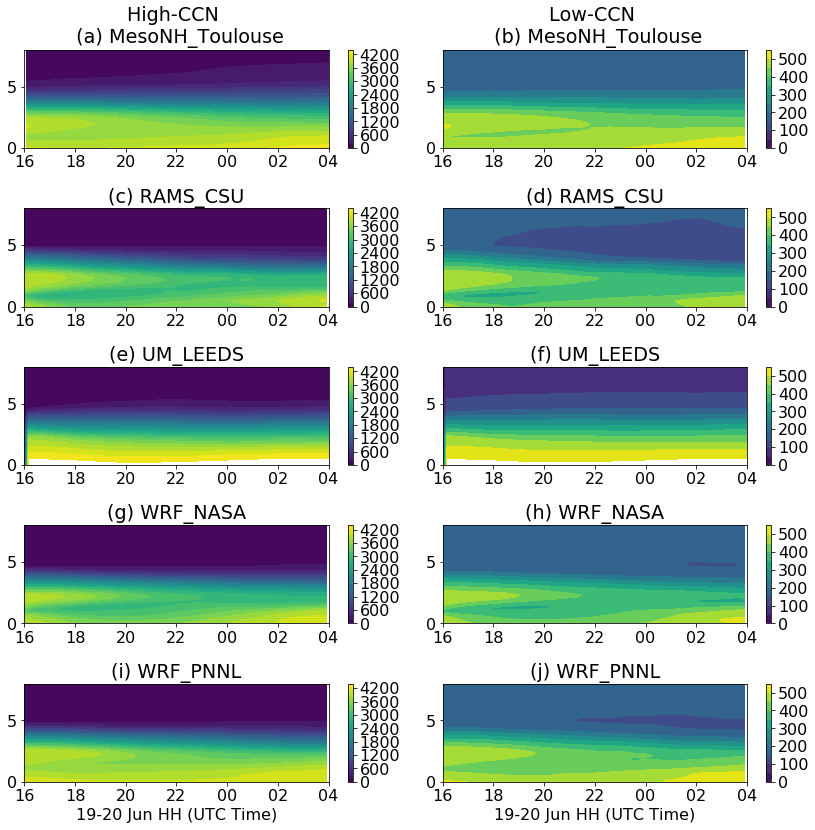

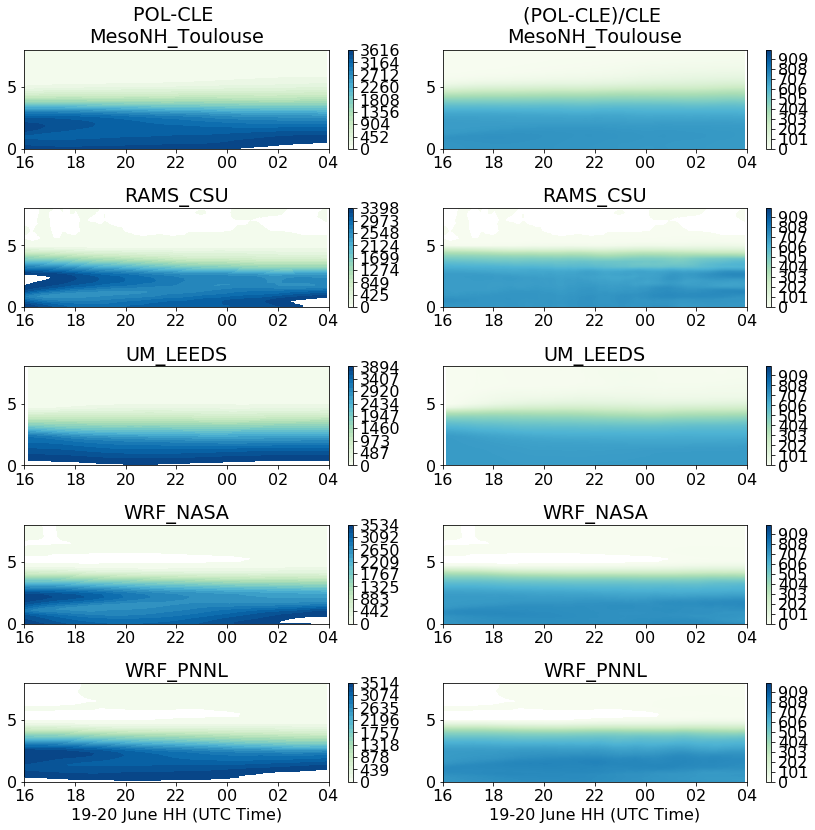

In [27]:
#############################################################
# Plot Mean Profiles Averaged Over Time for Variable
# Loop through thresholds
#############################################################

#### SET DATE SPECIFICS
import matplotlib.dates as mdates
dateFmt = mdates.DateFormatter('%HH')
dateB = datetime.datetime(2013,6,19,16,0,0)
dateE = datetime.datetime(2013,6,20,4,0,0)
time_range=[dateB,dateE]
constraint_time=iris.Constraint(time = lambda cell: time_range[0]<= cell <=  time_range[1])
ylims = [0,8]
cntr_lvls_p = np.arange(0,4500,200); cntr_p_lvls = np.arange(0,1001,1)
cntr_lvls_c = np.arange(0,600,50);
# cntr_d_lvls = calculated below for each model

sub_labels = ['(a) ','(b) ','(c) ','(d) ','(e) ','(f) ','(g) ','(h) ','(i) ','(j) ','(k) ','(l) ','(m) ','(n) ']
sub_labels = ['(a) ','(b) ','(c) ','(d) ','(e) ','(f) ','(g) ','(h) ','(i) ','(j) ']

#thresh = ['','_qtcp1','_qtcp01','_noqtcp01']
thresh = ['_noqtcp01']
for i in np.arange(0,len(thresh)):
    print(thresh[i])

    var_xy_mean={}
    for model in models:

        if model == 'WRF_PNNL':
            savedir_i=os.path.join(savedir2,varname)
            print(savedir_i)
        else:
            savedir_i=os.path.join(savedir2,varname)
            print(savedir_i)
        
        for case in cases:
            print(model,case)
            if model == 'COSMO_KIT':
                var_xy_mean[model,case]=iris.load_cube(os.path.join(savedir_i,f'{varname}_xy_mean_WRF_OXF_{case}_{dx}_{dt}{thresh[i]}_d.nc'))
            else:
                var_xy_mean[model,case]=iris.load_cube(os.path.join(savedir_i,f'{varname}_xy_mean_{model}_{case}_{dx}_{dt}{thresh[i]}_d.nc'))
        
#############################################################
# Plot Mean Profiles Averaged Over Time for Variable
#############################################################

#    fig,ax = plt.subplots(nrows=7,ncols=2,figsize=(30/2.54,40/2.54))
    fig,ax = plt.subplots(nrows=5,ncols=2,figsize=(30/2.54,30/2.54))
    fig.subplots_adjust(left=0.1,right=0.95,hspace=0.3,
                     bottom=0.1,top=0.85,wspace=0.2)
    cntm = 0
    cnt_lab = 0
    for model in models:
        cntc = 0            
        for case in cases:
            print(model,case)

            # Get Date Array for Plotting
            xdates = []
            for j in np.arange(0,np.shape(var_xy_mean[model,case].coord('time'))[0]):
                cur_date = datetime.datetime(1970,1,1) + datetime.timedelta(days=var_xy_mean[model,case].coord('time').points[j])
                #print(cur_date)
                xdates = np.append(xdates,cur_date)
            xdates = xdates[0:144]
            print(np.shape(xdates))
            
            var_plot = np.transpose(var_xy_mean[model,case].extract(constraint_time).data*scale_factor)
            y_arr = var_xy_mean[model,case].coord('geopotential_height').points/1000
            x_arr = var_xy_mean[model,case].coord('time').points[0:144]
            var_plot = var_plot[:,0:144]

            if model == 'WRF_OXF' or model == 'COSMO_KIT':
                var_plot[:,60] = var_plot[:,59] 
                var_plot[:,96] = var_plot[:,95] 
            
            if case == 'POL':
                cntr_lvls = cntr_lvls_p
                casename = 'High-CCN'
            else:
                cntr_lvls = cntr_lvls_c
                casename = 'Low-CCN'
                    
            a = ax[cntm,cntc].contourf(xdates,y_arr,var_plot,levels=cntr_lvls)
            plt.colorbar(a,ax=ax[cntm,cntc])
            ax[cntm,cntc].set_ylim(ylims)

            ax[cntm,cntc].set_xlim(dateB,dateE)
            ax[cntm,cntc].xaxis.set_major_formatter(mdates.DateFormatter('%H'))
            
            if cntm == 0:
                ax[cntm,cntc].set_title(casename+' \n '+sub_labels[cnt_lab]+model)        
            else:
                ax[cntm,cntc].set_title(sub_labels[cnt_lab]+model)  
                
            if cntm == 4:
                ax[cntm,cntc].set_xlabel('19-20 Jun HH (UTC Time)')                
            cnt_lab = cnt_lab + 1
            cntc = cntc + 1
        cntm = cntm + 1
        
    plt.tight_layout()
    filename=varname+'_prof_evol_POLCLE'+thresh[i]+savename_extra+'.pdf'
    #fig.savefig(os.path.join(plotdir,filename),dpi=300)        
    #plt.close(fig)
    
#############################################################
# Plot Mean Profiles Averaged Over Time for Variable
# Difference and Percentage Differences
#############################################################

    fig,ax = plt.subplots(nrows=5,ncols=2,figsize=(30/2.54,30/2.54))
    fig.subplots_adjust(left=0.1,right=0.95,hspace=0.3,
                     bottom=0.1,top=0.85,wspace=0.2)

    cntm = 0
    for model in models:

        # Get Date Array for Plotting
        xdates = []
        for j in np.arange(0,np.shape(var_xy_mean[model,case].coord('time'))[0]):
            cur_date = datetime.datetime(1970,1,1) + datetime.timedelta(days=var_xy_mean[model,case].coord('time').points[j])
            #print(cur_date)
            xdates = np.append(xdates,cur_date)
        xdates = xdates[0:144]
        
        var_cle = np.transpose(var_xy_mean[model,'CLN'].extract(constraint_time).data*scale_factor)
        var_pol = np.transpose(var_xy_mean[model,'POL'].extract(constraint_time).data*scale_factor)
        var_cle = var_cle[:,0:144]
        var_pol = var_pol[:,0:144]

        if model == 'WRF_OXF' or model == 'COSMO_KIT':
            var_cle[:,60] = var_cle[:,59] 
            var_cle[:,96] = var_cle[:,95] 
            var_pol[:,60] = var_pol[:,59] 
            var_pol[:,96] = var_pol[:,95]         
        
        var_dif_plot = var_pol-var_cle
        var_pdif_plot = (var_pol-var_cle)/var_cle * 100

        var_dif_plot[var_pol < 0.0001] = np.nan
        var_dif_plot[var_cle < 0.0001] = np.nan

        var_pdif_plot[var_pol < 0.0001] = np.nan
        var_pdif_plot[var_cle < 0.0001] = np.nan
    
        y_arr = var_xy_mean[model,case].coord('geopotential_height').points/1000
        x_arr = var_xy_mean[model,case].coord('time').points[0:144]

        # Calculate countour levels for each model
        maxval = np.nanmax(np.abs(var_dif_plot))
        cntr_d_lvls = np.arange(0,maxval,maxval/25) 
    
        a = ax[cntm,0].contourf(xdates,y_arr,var_dif_plot,levels=cntr_d_lvls,cmap=plt.cm.GnBu)
        plt.colorbar(a,ax=ax[cntm,0])
        ax[cntm,0].set_ylim(ylims)
        ax[cntm,0].set_xlim(dateB,dateE)
        ax[cntm,0].xaxis.set_major_formatter(mdates.DateFormatter('%H'))

        b = ax[cntm,1].contourf(xdates,y_arr,var_pdif_plot,levels=cntr_p_lvls,cmap=plt.cm.GnBu)
        plt.colorbar(b,ax=ax[cntm,1])
        ax[cntm,1].set_ylim(ylims)
        ax[cntm,1].set_xlim(dateB,dateE)
        ax[cntm,1].xaxis.set_major_formatter(mdates.DateFormatter('%H'))

        if cntm == 0:
            ax[cntm,0].set_title('POL-CLE \n'+model)
            ax[cntm,1].set_title('(POL-CLE)/CLE \n'+model)
        else:
            ax[cntm,0].set_title(model)
            ax[cntm,1].set_title(model)
            
        if cntm == 4:
            ax[cntm,0].set_xlabel('19-20 June HH (UTC Time)')
            ax[cntm,1].set_xlabel('19-20 June HH (UTC Time)')
            
        cntm = cntm + 1   
    
    plt.tight_layout()
    #filename=varname+'_prof_evol_POLCLE_DIF'+thresh[i]+savename_extra+'.pdf'
    #fig.savefig(os.path.join(plotdir,filename),dpi=300)        
    #plt.close(fig)
    

_noqtcp01
/group_workspaces/jasmin2/acpc/houston_deep_convection/Processing/Save_Apr2020/NAERO
MesoNH_Toulouse POL
MesoNH_Toulouse CLN
/group_workspaces/jasmin2/acpc/houston_deep_convection/Processing/Save_Apr2020/NAERO
RAMS_CSU POL
RAMS_CSU CLN
/group_workspaces/jasmin2/acpc/houston_deep_convection/Processing/Save_Apr2020/NAERO
UM_LEEDS POL
UM_LEEDS CLN
/group_workspaces/jasmin2/acpc/houston_deep_convection/Processing/Save_Apr2020/NAERO
WRF_NASA POL
WRF_NASA CLN
/group_workspaces/jasmin2/acpc/houston_deep_convection/Processing/Save_Apr2020/NAERO
WRF_PNNL POL
WRF_PNNL CLN
MesoNH_Toulouse POL
(144,)
MesoNH_Toulouse CLN
(144,)
RAMS_CSU POL
(144,)
RAMS_CSU CLN
(144,)
UM_LEEDS POL
(144,)
UM_LEEDS CLN
(144,)
WRF_NASA POL
(144,)
WRF_NASA CLN
(144,)
WRF_PNNL POL
(144,)
WRF_PNNL CLN
(144,)


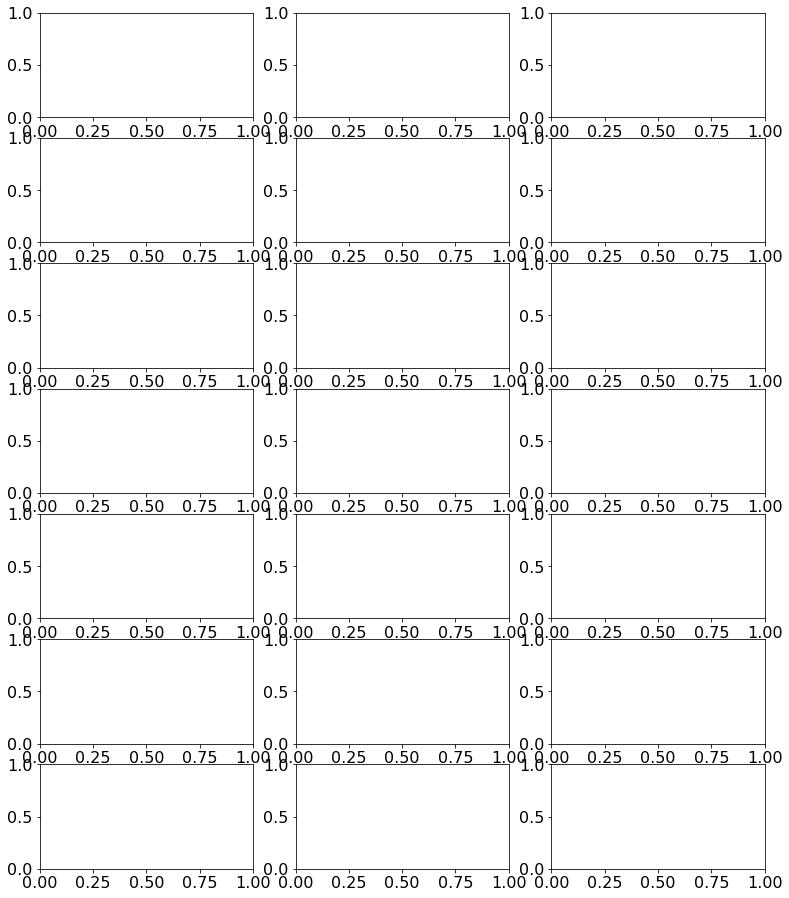

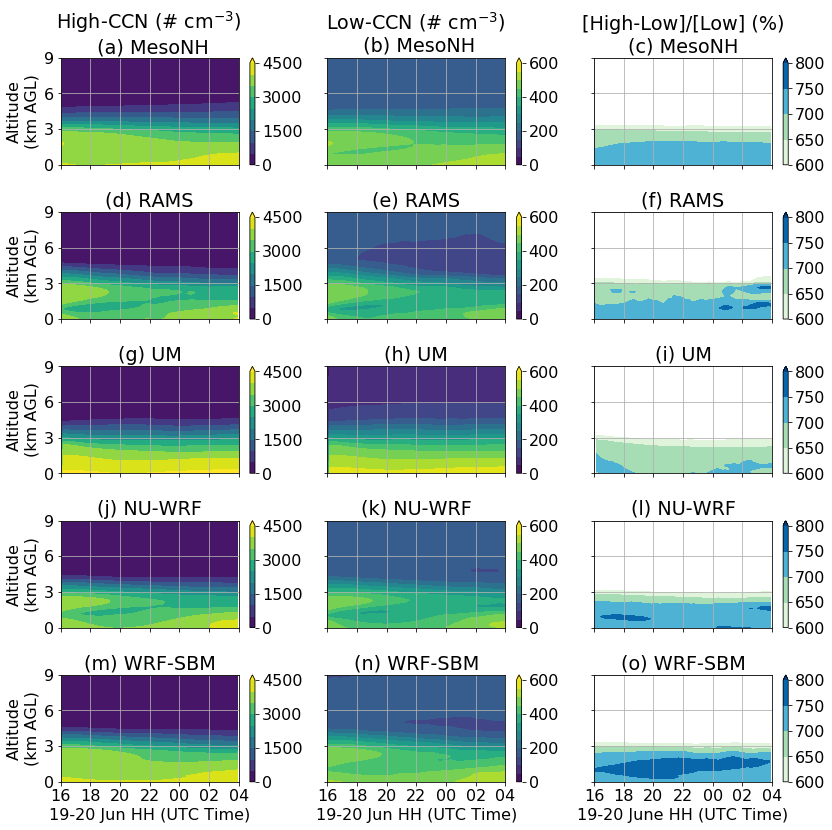

In [28]:
#############################################################
# Plot Mean Profiles Averaged Over Time for Variable
# Loop through thresholds
#############################################################

pdif_prof = OrderedDict()
plt.rcParams.update({'font.size': 16})
ylims = [0,9]
yticks = [0,3,6,9]
#### SET DATE SPECIFICS
import matplotlib.dates as mdates
dateFmt = mdates.DateFormatter('%HH')
dateB = datetime.datetime(2013,6,19,16,0,0)
dateE = datetime.datetime(2013,6,20,4,0,0)
time_range=[dateB,dateE]
constraint_time=iris.Constraint(time = lambda cell: time_range[0]<= cell <=  time_range[1])

cntr_lvls_p = np.arange(0,4801,500); cntr_p_lvls = np.arange(0,901,100)
cntr_lvls_c = np.arange(0,601,50);
# cntr_d_lvls = calculated below for each model

cticks0 = np.arange(0,4801,1500) 
cticks1 = np.arange(0,601,200) 
cticks2 = np.arange(0,901,300) 

cntr_p_lvls = np.arange(600,801,50)
cticks2 = np.arange(600,801,50) 


sub_labels = ['(a) ','(b) ','(c) ','(d) ','(e) ','(f) ','(g) ','(h) ','(i) ','(j) ','(k) ','(l) ','(m) ','(n) ','(o) ','(p) ','(q) ','(r) ','(s) ','(t) ','(u) ']
sub_labels = ['(a) ','(b) ','(c) ','(d) ','(e) ','(f) ','(g) ','(h) ','(i) ','(j) ','(k) ','(l) ','(m) ','(n) ','(o) ','(p) ','(q) ']

#thresh = ['','_qtcp1','_qtcp01','_noqtcp01']
thresh = ['_noqtcp01']
for i in np.arange(0,len(thresh)):
    print(thresh[i])
    var_xy_mean={}
    for model in models:

        if model == 'WRF_PNNL':
            savedir_i=os.path.join(savedir2,varname)
            print(savedir_i)
        else:
            savedir_i=os.path.join(savedir2,varname)
            print(savedir_i)

        for case in cases:
            print(model,case)
            if model == 'COSMO_KIT':
                var_xy_mean[model,case]=iris.load_cube(os.path.join(savedir_i,f'{varname}_xy_mean_WRF_OXF_{case}_{dx}_{dt}{thresh[i]}_d.nc'))
            else:
                var_xy_mean[model,case]=iris.load_cube(os.path.join(savedir_i,f'{varname}_xy_mean_{model}_{case}_{dx}_{dt}{thresh[i]}_d.nc'))
        
#############################################################
# Plot Mean Profiles Averaged Over Time for Variable
#############################################################

    fig,ax = plt.subplots(nrows=7,ncols=3,figsize=(33/2.54,40/2.54))
    fig,ax = plt.subplots(nrows=5,ncols=3,figsize=(30/2.54,30/2.54))
    fig.subplots_adjust(left=0.05,right=0.95,hspace=0.0,
                     bottom=0.05,top=0.95,wspace=0.0)
    cntm = 0
    cnt_lab = 0
    for model in models:
        cntc = 0            
        modelname = modelnames[cntm]
        for case in cases:
            print(model,case)

            
            # Get Date Array for Plotting
            xdates = []
            for j in np.arange(0,np.shape(var_xy_mean[model,case].coord('time'))[0]):
                cur_date = datetime.datetime(1970,1,1) + datetime.timedelta(days=var_xy_mean[model,case].coord('time').points[j])
                #print(cur_date)
                xdates = np.append(xdates,cur_date)
            xdates = xdates[0:144]
            print(np.shape(xdates))
            
            var_plot = np.transpose(var_xy_mean[model,case].extract(constraint_time).data*scale_factor)
            y_arr = var_xy_mean[model,case].coord('geopotential_height').points/1000
            x_arr = var_xy_mean[model,case].coord('time').points[0:144]
            var_plot = var_plot[:,0:144]

            if model == 'WRF_OXF' or model == 'COSMO_KIT':
                var_plot[:,60] = var_plot[:,59] 
                var_plot[:,96] = var_plot[:,95] 
            
            if case == 'POL':
                cntr_lvls = cntr_lvls_p
                casename = 'High-CCN (# cm$^{-3}$)'
                cticksnow = cticks0
            else:
                cntr_lvls = cntr_lvls_c
                casename = 'Low-CCN (# cm$^{-3}$)'
                cticksnow = cticks1                    
            a = ax[cntm,cntc].contourf(xdates,y_arr,var_plot,levels=cntr_lvls,extend='max')
            cbar1 = plt.colorbar(a,ax=ax[cntm,cntc],ticks=cticksnow)

            ax[cntm,cntc].set_ylim(ylims)

            ax[cntm,cntc].set_xlim(dateB,dateE)
            ax[cntm,cntc].xaxis.set_major_formatter(mdates.DateFormatter('%H'))
            
            if cntm == 0:
                ax[cntm,cntc].set_title(casename+' \n '+sub_labels[cnt_lab]+modelname)        
            else:
                ax[cntm,cntc].set_title(sub_labels[cnt_lab]+modelname)  
                
            if cntm == 4:
                ax[cntm,cntc].set_xlabel('19-20 Jun HH (UTC Time)')                
            else:
                ax[cntm,cntc].set_xticklabels('')
            cnt_lab = cnt_lab + 1
            cntc = cntc + 1
        
        # Get Date Array for Plotting
        xdates = []
        for j in np.arange(0,np.shape(var_xy_mean[model,case].coord('time'))[0]):
            cur_date = datetime.datetime(1970,1,1) + datetime.timedelta(days=var_xy_mean[model,case].coord('time').points[j])
            #print(cur_date)
            xdates = np.append(xdates,cur_date)
        xdates = xdates[0:144]
        
        var_cle = np.transpose(var_xy_mean[model,'CLN'].extract(constraint_time).data*scale_factor)
        var_pol = np.transpose(var_xy_mean[model,'POL'].extract(constraint_time).data*scale_factor)
        var_cle = var_cle[:,0:144]
        var_pol = var_pol[:,0:144]

        if model == 'WRF_OXF' or model == 'COSMO_KIT':
            var_cle[:,60] = var_cle[:,59] 
            var_cle[:,96] = var_cle[:,95] 
            var_pol[:,60] = var_pol[:,59] 
            var_pol[:,96] = var_pol[:,95]         
        
        var_dif_plot = var_pol-var_cle
        var_pdif_plot = (var_pol-var_cle)/var_cle * 100

        var_dif_plot[var_pol < 0.0001] = np.nan
        var_dif_plot[var_cle < 0.0001] = np.nan

        var_pdif_plot[var_pol < 0.0001] = np.nan
        var_pdif_plot[var_cle < 0.0001] = np.nan
    
        y_arr = var_xy_mean[model,case].coord('geopotential_height').points/1000
        x_arr = var_xy_mean[model,case].coord('time').points[0:144]

        # Calculate countour levels for each model
        maxval = np.nanmax(np.abs(var_dif_plot))
        cntr_d_lvls = np.arange(0,maxval,maxval/25) 

        pdif_prof[model] = np.nanmean(var_pdif_plot,axis=1)        
#        a = ax[cntm,0].contourf(xdates,y_arr,var_dif_plot,levels=cntr_d_lvls,cmap=plt.cm.GnBu)
#        plt.colorbar(a,ax=ax[cntm,0])
#        ax[cntm,0].set_ylim([0,12])
#        ax[cntm,0].set_xlim(dateB,dateE)
#        ax[cntm,0].xaxis.set_major_formatter(mdates.DateFormatter('%H'))

        b = ax[cntm,2].contourf(xdates,y_arr,var_pdif_plot,levels=cntr_p_lvls,cmap=plt.cm.GnBu,extend='max')
        cbar = plt.colorbar(b,ax=ax[cntm,2],ticks=cticks2)
        ax[cntm,2].set_ylim(ylims)
        ax[cntm,2].set_xlim(dateB,dateE)
        ax[cntm,2].xaxis.set_major_formatter(mdates.DateFormatter('%H'))

        if cntm == 0:
            ax[cntm,2].set_title('[High-Low]/[Low] (%)\n'+sub_labels[cnt_lab]+modelname)
        else:
            ax[cntm,2].set_title(sub_labels[cnt_lab]+modelname)
            
        if cntm == 4:
            ax[cntm,2].set_xlabel('19-20 June HH (UTC Time)')
        else:
            ax[cntm,2].set_xticklabels('')
            
            
        cnt_lab = cnt_lab + 1
            
        cntm = cntm + 1   

    for ii in np.arange(0,5):
        for jj in np.arange(0,3):
            ax[ii,jj].set_yticks(yticks)
            ax[ii,jj].grid()
        
    for ii in np.arange(0,5):
        ax[ii,2].set_yticklabels('')
        ax[ii,1].set_yticklabels('')
        ax[ii,0].set_ylabel('Altitude\n(km AGL)')

    plt.tight_layout()
    filename=varname+'_prof_evol_POLCLE_DIF'+thresh[i]+savename_extra+'_PUB.pdf'
    fig.savefig(os.path.join(plotdir,filename),dpi=300)        
    
    filename=varname+'_prof_evol_POLCLE_DIF'+thresh[i]+savename_extra+'_PUB.png'
    fig.savefig(os.path.join(plotdir,filename),dpi=300)        
    
    filename=varname+'_prof_evol_POLCLE_DIF'+thresh[i]+savename_extra+'_PUB.eps'
    fig.savefig(os.path.join(plotdir,filename),dpi=300)        
    
    #plt.close(fig)
    

In [29]:
print(plotdir)

/group_workspaces/jasmin2/acpc/public/acpc/pmarin/Manuscript


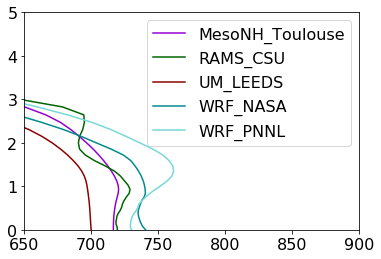

In [17]:
plt.figure;
for model in models:
    plt.plot(pdif_prof[model],var_xy_mean[model,case].coord('geopotential_height').points/1000,color=color[model],label=model)
plt.ylim([0,5])
plt.xlim([650,900])
plt.legend()